In [ ]:
## Notebook env: mirtud_env (R kernel)

In [1]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
## load data
apop_flow = read.csv('/home/ssobti/projects/mir_tud/wetlab_followup_data/cellcycle/050924_apoptosis_rate.csv', header = FALSE)
colnames(apop_flow) = c('sample', 'rep_1', 'rep_2', 'rep_3')
apop_flow = apop_flow %>% pivot_longer(cols = -sample, names_to = 'replicate', values_to = 'pct_cells') %>% separate_wider_delim(cols = 'replicate', delim = '_', names = c(NA, 'replicate'))
apop_flow


Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/home/ssobti/projects/mir_tud/wetlab_followup_data/cellcycle/050924_apoptosis_rate.csv'”


sample,replicate,pct_cells
<chr>,<chr>,<dbl>
Non-targeting TuD,1,12.46
Non-targeting TuD,2,11.96
Non-targeting TuD,3,13.74
tRNA-Arg-CCT-3-1.lh,1,11.01
tRNA-Arg-CCT-3-1.lh,2,10.14
tRNA-Arg-CCT-3-1.lh,3,9.82
tRNA-Cys-GCA-4-1.2t,1,19.78
tRNA-Cys-GCA-4-1.2t,2,18.27
tRNA-Cys-GCA-4-1.2t,3,15.22


Warning message in geom_bar(stat = "summary", fun.y = "mean", show.legend = FALSE):
“Ignoring unknown parameters: `fun.y`”


No summary function supplied, defaulting to `mean_se()`


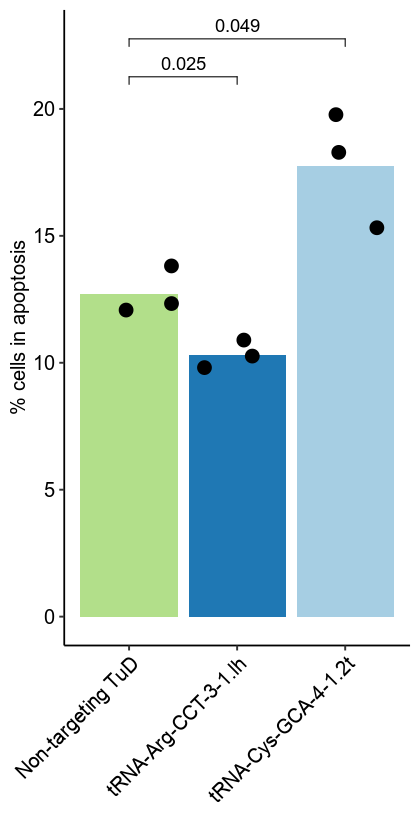

In [3]:
options(repr.plot.width = 3.5, repr.plot.height = 7)
samples = apop_flow %>% pull(sample) %>% unique() %>% sort()
my_comparisons = list(c(samples[1], samples[2]), c(samples[1], samples[3]))
upper_lim = max(apop_flow %>% pull(pct_cells))*1.05

apop_flow %>% ggplot(aes(sample, pct_cells, fill = sample)) + geom_bar(stat = 'summary', fun.y = 'mean', show.legend = FALSE) +
geom_jitter(size = 3.5, show.legend = FALSE) + stat_compare_means(method = "t.test", comparisons = my_comparisons, label.y = upper_lim, step.increase = 0.15) + theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) + xlab('') + ylab('% cells in apoptosis') + scale_fill_brewer(palette = 'Paired', direction = -1) + scale_color_brewer(palette = 'Paired', direction = -1)

In [5]:
saveRDS(apop_flow, '/home/ssobti/projects/mir_tud/fig_output/data/fig3/tRF_apop_flow.rds')